---

**Load Libraries**

---

In [108]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

from imblearn.over_sampling import SMOTE

---

**Load Files**

---

In [109]:
train_data = pd.read_csv('C:\\Users\\magda\\Desktop\\cleaned_data\\cleaned_train_data.csv')
validation_data = pd.read_csv('C:\\Users\\magda\\Desktop\\cleaned_data\\cleaned_validation_data.csv')

---

**TF-IDF Vectorization**

---

In [110]:
# Extract text and title data from train_data
text_data_tfidf = train_data['text']
title_data_tfidf = train_data['title']

# Extract text and title data from validation_data
val_text_data_tfidf = validation_data['text']
val_title_data_tfidf = validation_data['title']

# Initialize separate TF-IDF vectorizers for text and titles from train_data
text_vectorizer = TfidfVectorizer(max_features=50)  # Top 50 features for text
title_vectorizer = TfidfVectorizer(max_features=50)  # Top 50 features for titles

# Initialize separate TF-IDF vectorizers for text and titles from validation_data
val_text_vectorizer = TfidfVectorizer(max_features=50)  # Top 50 features for text
val_title_vectorizer = TfidfVectorizer(max_features=50)  # Top 50 features for titles


# Fit and transform the text and title data for train_data
text_tfidf_matrix = text_vectorizer.fit_transform(text_data_tfidf)
title_tfidf_matrix = title_vectorizer.fit_transform(title_data_tfidf)

# Fit and transform the text and title data for validation_data
val_text_tfidf_matrix = text_vectorizer.fit_transform(val_text_data_tfidf)
val_title_tfidf_matrix = title_vectorizer.fit_transform(val_title_data_tfidf)

# Convert the matrices to DataFrames for better readability for train_data
text_tfidf_df = pd.DataFrame(text_tfidf_matrix.toarray(), columns=text_vectorizer.get_feature_names_out())
title_tfidf_df = pd.DataFrame(title_tfidf_matrix.toarray(), columns=title_vectorizer.get_feature_names_out())

# Convert the matrices to DataFrames for better readability for validation_data
val_text_tfidf_df = pd.DataFrame(text_tfidf_matrix.toarray(), columns=text_vectorizer.get_feature_names_out())
val_title_tfidf_df = pd.DataFrame(title_tfidf_matrix.toarray(), columns=title_vectorizer.get_feature_names_out())

from IPython.display import display

# Display the TF-IDF DataFrames
print("TF-IDF Matrix for Text Content:")
display(text_tfidf_df)

print("TF-IDF Matrix for Title Content:")
display(title_tfidf_df)



TF-IDF Matrix for Text Content:


,affected,alert,allergen,allergy,available,batch,best,brand,cfia,chicken,...,risk,safety,salmonella,size,sold,store,taken,tdtd,tr,use
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.420697,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,0.428073,0.159918,0.307038,0.0,0.000000,0.459535,0.000000,0.067710,0.076805,0.000000,...,0.000000,0.000000,0.067675,0.068426,0.000000,0.0,0.000000,0.0,0.0,0.0
5078,0.000000,0.000000,0.000000,0.0,0.110662,0.000000,0.000000,0.000000,0.000000,0.157685,...,0.000000,0.000000,0.138939,0.046827,0.000000,0.0,0.051559,0.0,0.0,0.0
5079,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.197719,0.336416,0.168209,...,0.086841,0.000000,0.000000,0.000000,0.087477,0.0,0.000000,0.0,0.0,0.0
5080,0.000000,0.000000,0.186426,0.0,0.098183,0.000000,0.497634,0.041112,0.326441,0.034976,...,0.000000,0.000000,0.123272,0.000000,0.036378,0.0,0.045745,0.0,0.0,0.0


TF-IDF Matrix for Title Content:


,alert,allergen,allergy,almond,announces,beef,brand,butter,cheese,chicken,...,product,pty,recall,recalled,risk,salad,salmonella,sesame,undeclared,voluntary
0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,0.0,0.405129,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5078,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.452200,0.0,0.323688,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5079,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.292812,0.0,0.209597,0.0,0.0,0.0,0.0,0.000000,0.564457,0.0
5080,0.0,0.338712,0.0,0.0,0.38527,0.278326,0.0,0.0,0.0,0.0,...,0.240231,0.0,0.171959,0.0,0.0,0.0,0.0,0.240231,0.000000,0.0


**Interpreting TF-IDF Values**

(In this analysis, we visualize the TF-IDF scores of terms from the text and title datasets. These values help identify the most significant terms in our dataset.)\

- **Top 20 TF-IDF Features (Title)**
This chart shows the most significant terms in the title field based on their TF-IDF scores. High-ranking terms like "recall," "due," and "undeclared" suggest a focus on product recall announcements and allergen-related issues. These terms are distinct to specific titles.

- **Top 20 TF-IDF Features (Text)**
This chart highlights key terms from the text field. Prominent terms like "product," "recall," and "food" indicate a strong emphasis on product recall notifications and food safety. Additional terms like "consumer," "milk," and "allergy" reinforce the dataset’s relevance to consumer alerts and allergen concerns.



C:\Users\magda\AppData\Local\Temp\ipykernel_17148\2734190761.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(colormap)(norm(values))
C:\Users\magda\AppData\Local\Temp\ipykernel_17148\2734190761.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax.set_title(title, fontsize=16, fontweight='bold', color=plt.cm.get_cmap(colormap)(0.7))


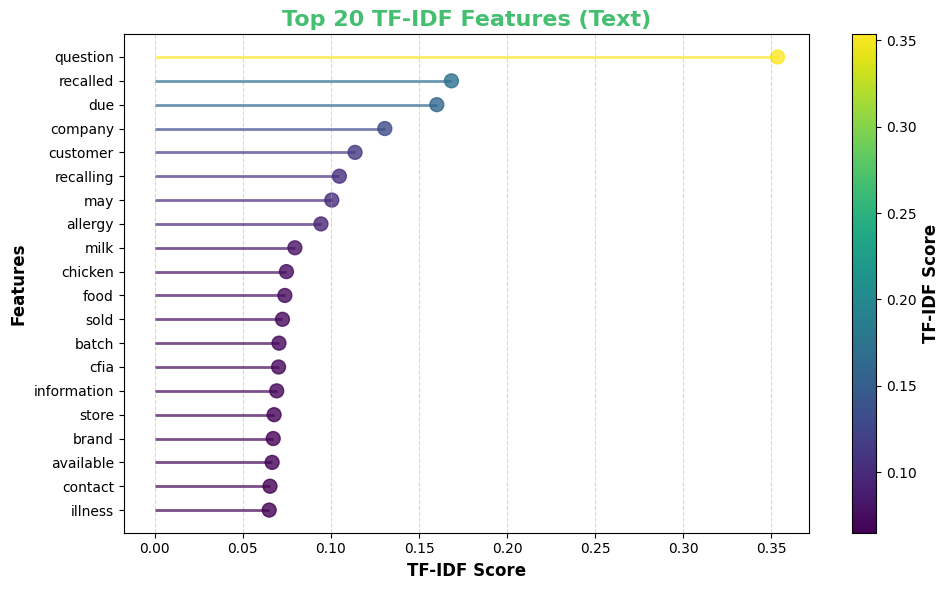

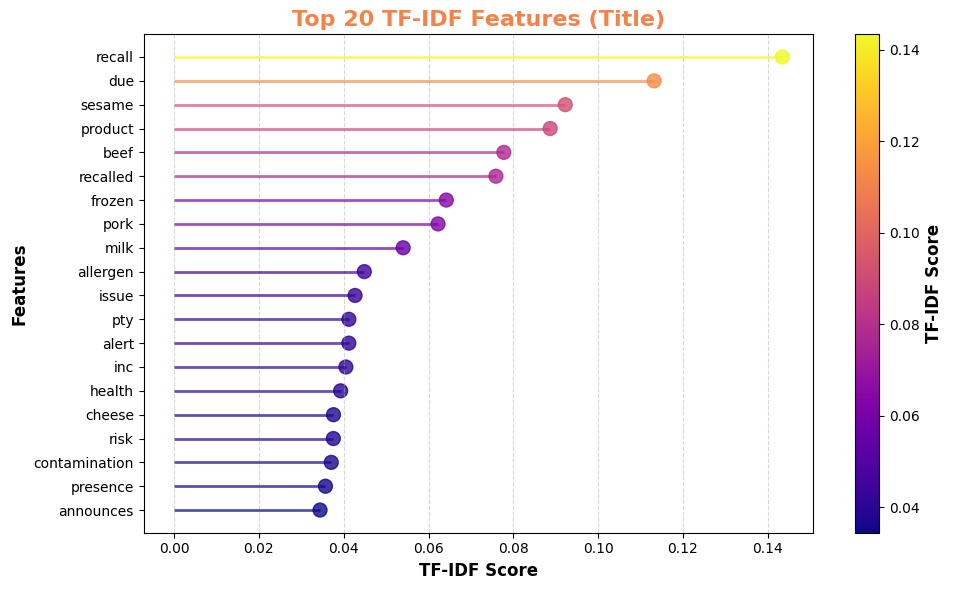

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Adjusting the colorbar configuration to resolve the issue
def lollipop_chart(data, title, colormap):
    # Sort data for clarity
    sorted_data = data.sort_values()
    features = sorted_data.index
    values = sorted_data.values

    # Generate colors based on values
    norm = plt.Normalize(vmin=min(values), vmax=max(values))
    colors = plt.cm.get_cmap(colormap)(norm(values))

    # Plot configuration
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hlines(y=features, xmin=0, xmax=values, color=colors, alpha=0.7, linewidth=2)
    ax.scatter(values, features, color=colors, s=100, alpha=0.8)

    # Add labels and title
    ax.set_xlabel("TF-IDF Score", fontsize=12, fontweight='bold')
    ax.set_ylabel("Features", fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold', color=plt.cm.get_cmap(colormap)(0.7))
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Add colorbar using the correct axes
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('TF-IDF Score', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()


# Use TF-IDF for text and title
top_text_features = text_tfidf_df.mean().nlargest(20)  # Top 20 features based on mean values
top_title_features = title_tfidf_df.mean().nlargest(20)  # Top 20 features based on mean values

# Create enhanced lollipop charts with gradient colors
lollipop_chart(top_text_features, "Top 20 TF-IDF Features (Text)", 'viridis')
lollipop_chart(top_title_features, "Top 20 TF-IDF Features (Title)", 'plasma')



---

**Basic Model**
    *Training*

---

**Logistic Regression**

1. Logistic Regression is computationally lightweight and trains quickly even on large datasets.
It works well with high-dimensional sparse data like TF-IDF.
2. Logistic Regression is a strong baseline for text classification tasks.
It handles imbalanced class distributions reasonably well when paired with class weights.
3. The learned coefficients provide insight into the importance of features (e.g., TF-IDF terms).

In [112]:
# Step 1: Prepare training and validation labels
# Subtask 1
y_train_hazard_cat = train_data['hazard-category']  # Hazard category labels
y_train_product_cat = train_data['product-category']  # Product category labels

#Subtask 2
y_train_hazard = train_data['hazard']  # Hazard labels
y_train_product = train_data['product']  # Product labels

# Use TF-IDF features for both text and title
X_train_text = text_tfidf_df
X_train_title = title_tfidf_df
X_val_text = val_text_tfidf_df
X_val_title = val_title_tfidf_df



The dataset is split into training and test subsets to evaluate model performance before making predictions on the validation dataset. The splits are applied for four target variables: hazard-category, product-category, hazard, and product. These variables correspond to the two main subtasks of the challenge.

In [113]:
from sklearn.model_selection import train_test_split

# Split the training data into train and test subsets
X_train_split, X_test_split, y_train_hazard_cat_split, y_test_hazard_cat_split = train_test_split(
    X_train_text, y_train_hazard_cat, test_size=0.2, random_state=42
)

X_train_split, X_test_split, y_train_product_cat_split, y_test_product_cat_split = train_test_split(
    X_train_text, y_train_product_cat, test_size=0.2, random_state=42
)

X_train_split, X_test_split, y_train_hazard_split, y_test_hazard_split = train_test_split(
    X_train_text, y_train_hazard, test_size=0.2, random_state=42
)

X_train_split, X_test_split, y_train_product_split, y_test_product_split = train_test_split(
    X_train_text, y_train_product, test_size=0.2, random_state=42
)



#### **Subtask 1:**
 ##### Hazard-Category

In [114]:
# Train Logistic Regression for hazard-category
logreg_hazard_cat = LogisticRegression(max_iter=1000,  class_weight='balanced', random_state=42, n_jobs=-1)
logreg_hazard_cat.fit(X_train_split, y_train_hazard_cat_split)

# Predict on test subset
test_predictions_hazard_cat = logreg_hazard_cat.predict(X_test_split)

# Compute scores
f1_hazard = f1_score(y_test_hazard_cat_split, test_predictions_hazard_cat, average='macro')
print(f"Macro F1-Score for Hazard-Category: {f1_hazard}")



Macro F1-Score for Hazard-Category: 0.27286281876953833


In [115]:
import pandas as pd

# Generate classification report as a dictionary
report_dict = classification_report(y_test_hazard_cat_split, test_predictions_hazard_cat, zero_division=0, output_dict=True)

# Convert to pandas DataFrame for display
report_df = pd.DataFrame(report_dict).transpose()

# Display the report 
print("\nClassification Report for Hazard-Category:")
report_df



Classification Report for Hazard-Category:


,precision,recall,f1-score,support
allergens,0.945338,0.779841,0.854651,377.000000
biological,0.810127,0.566372,0.666667,339.000000
chemical,0.274725,0.367647,0.314465,68.000000
food additives and flavourings,0.044444,0.400000,0.080000,5.000000
foreign bodies,0.305556,0.099099,0.149660,111.000000
fraud,0.237624,0.352941,0.284024,68.000000
migration,0.000000,0.000000,0.000000,1.000000
organoleptic aspects,0.054545,0.300000,0.092308,10.000000
other hazard,0.097826,0.333333,0.151261,27.000000
packaging defect,0.083333,0.363636,0.135593,11.000000


Subtask 1: Product-Category

In [116]:
# Train Logistic Regression for product-category

logreg_product_cat = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, n_jobs=-1)
logreg_product_cat.fit(X_train_split, y_train_product_cat_split)

# Predict on test subset
test_predictions_product_cat = logreg_product_cat.predict(X_test_split)

# Compute scores
f1_product = f1_score(y_test_product_cat_split, test_predictions_product_cat, average='macro')
print(f"Macro F1-Score for Product-Category: {f1_product}")


Macro F1-Score for Product-Category: 0.12528507732206448


In [117]:
import pandas as pd

# Generate classification report as a dictionary
report_dict = classification_report(y_test_product_cat_split, test_predictions_product_cat,zero_division=0, output_dict=True)

# Convert to pandas DataFrame for display
report_df = pd.DataFrame(report_dict).transpose()

# Display the report 
print("\nClassification Report for Product-Category:")
report_df



Classification Report for Product-Category:


,precision,recall,f1-score,support
alcoholic beverages,0.056338,0.571429,0.102564,7.000000
cereals and bakery products,0.250000,0.105691,0.148571,123.000000
"cocoa and cocoa preparations, coffee and tea",0.126582,0.204082,0.156250,49.000000
confectionery,0.166667,0.075000,0.103448,40.000000
"dietetic foods, food supplements, fortified foods",0.100000,0.083333,0.090909,24.000000
fats and oils,0.093750,0.750000,0.166667,4.000000
feed materials,0.047619,0.333333,0.083333,3.000000
food additives and flavourings,0.000000,0.000000,0.000000,0.000000
food contact materials,0.027027,1.000000,0.052632,1.000000
fruits and vegetables,0.313725,0.142857,0.196319,112.000000


Subtask 2: Hazard

In [118]:
# Train Logistic Regression for hazard (vector)
logreg_hazard = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, n_jobs=-1)
logreg_hazard.fit(X_train_split, y_train_hazard_split)

# Predict on test subset
test_predictions_hazard = logreg_hazard.predict(X_test_split)

# Compute scores
f1_hazard_vector = f1_score(y_test_hazard_split, test_predictions_hazard, average='macro')
print(f"Macro F1-Score for Hazard (Vector): {f1_hazard_vector}")


Macro F1-Score for Hazard (Vector): 0.05537004328630751


In [119]:
import pandas as pd

# Generate classification report as a dictionary
report_dict = classification_report(y_test_hazard_split, test_predictions_hazard,zero_division=0, output_dict=True)

# Convert to pandas DataFrame for display
report_df = pd.DataFrame(report_dict).transpose()

# Display the report 
print("\nClassification Report for Hazard:")
report_df



Classification Report for Hazard:


,precision,recall,f1-score,support
Aflatoxin,0.000000,0.000000,0.000000,4.000000
abnormal smell,0.000000,0.000000,0.000000,0.000000
alcohol content,0.090909,1.000000,0.166667,1.000000
alkaloids,0.000000,0.000000,0.000000,2.000000
allergens,0.000000,0.000000,0.000000,4.000000
...,...,...,...,...
walnut,0.000000,0.000000,0.000000,5.000000
yeasts,0.000000,0.000000,0.000000,0.000000
accuracy,0.108161,0.108161,0.108161,0.108161
macro avg,0.064562,0.142045,0.055370,1017.000000


Subtask 2: Product

In [120]:
# Train Logistic Regression for product (vector)
logreg_product = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, n_jobs=-1)
logreg_product.fit(X_train_split, y_train_product_split)

# Predict on test subset
test_predictions_product = logreg_product.predict(X_test_split)

# Compute scores
f1_product_vector = f1_score(y_test_product_split, test_predictions_product, average='macro')
print(f"Macro F1-Score for Product (Vector): {f1_product_vector}")


Macro F1-Score for Product (Vector): 0.013571084999656428


In [121]:
import pandas as pd

# Generate classification report as a dictionary
report_dict = classification_report(y_test_product_split, test_predictions_product ,zero_division=0, output_dict=True)

# Convert to pandas DataFrame for display
report_df = pd.DataFrame(report_dict).transpose()

# Display the report 
print("\nClassification Report for Product:")
report_df



Classification Report for Product:


,precision,recall,f1-score,support
Catfishes (freshwater),0.000000,0.000000,0.000000,5.000000
Dried pork meat,0.000000,0.000000,0.000000,0.000000
Fishes not identified,0.000000,0.000000,0.000000,6.000000
Not classified pork meat,0.000000,0.000000,0.000000,3.000000
Pangas catfishes (generic),0.000000,0.000000,0.000000,1.000000
...,...,...,...,...
yellow peas,0.000000,0.000000,0.000000,0.000000
yoghurt,0.000000,0.000000,0.000000,5.000000
accuracy,0.017699,0.017699,0.017699,0.017699
macro avg,0.013445,0.018174,0.013571,1017.000000


Compute the Combined Score:

In [122]:
def compute_score(hazards_true, products_true, hazards_pred, products_pred):
    f1_hazards = f1_score(hazards_true, hazards_pred, average='macro')
    f1_products = f1_score(
        products_true[hazards_pred == hazards_true],
        products_pred[hazards_pred == hazards_true],
        average='macro'
    )
    return (f1_hazards + f1_products) / 2.

# Compute the combined score for Subtask 1
combined_score = compute_score(
    y_test_hazard_cat_split, y_test_product_cat_split,
    test_predictions_hazard_cat, test_predictions_product_cat
)

print(f"Combined Score for Hazard Category and Product Category Prediction: {combined_score}")

# Compute the combined score for Subtask 2
combined_score = compute_score(
    y_test_hazard_split, y_test_product_split,
    test_predictions_hazard, test_predictions_product
)

print(f"Combined Score for Hazard and Product Prediction: {combined_score}")



Combined Score for Hazard Category and Product Category Prediction: 0.18830684392826616
Combined Score for Hazard and Product Prediction: 0.03327786280646472


The following chart is a Combined F1 Score Visualization comparing the performance of two subtasks (Subtask 1 and Subtask 2). Each bar represents the combined F1 score of the respective subtask.

* Subtask 1 has a combined F1 score of 0.19, as indicated by the taller teal bar on the left.
* Subtask 2 has a lower combined F1 score of 0.03, represented by the shorter orange bar on the right.
* The visualization uses rounded bars with gradient colors and highlighted callout labels for each score to emphasize the values. The contrast in bar height clearly indicates that Subtask 1 has significantly better performance than Subtask 2 in terms of the combined F1 metric.

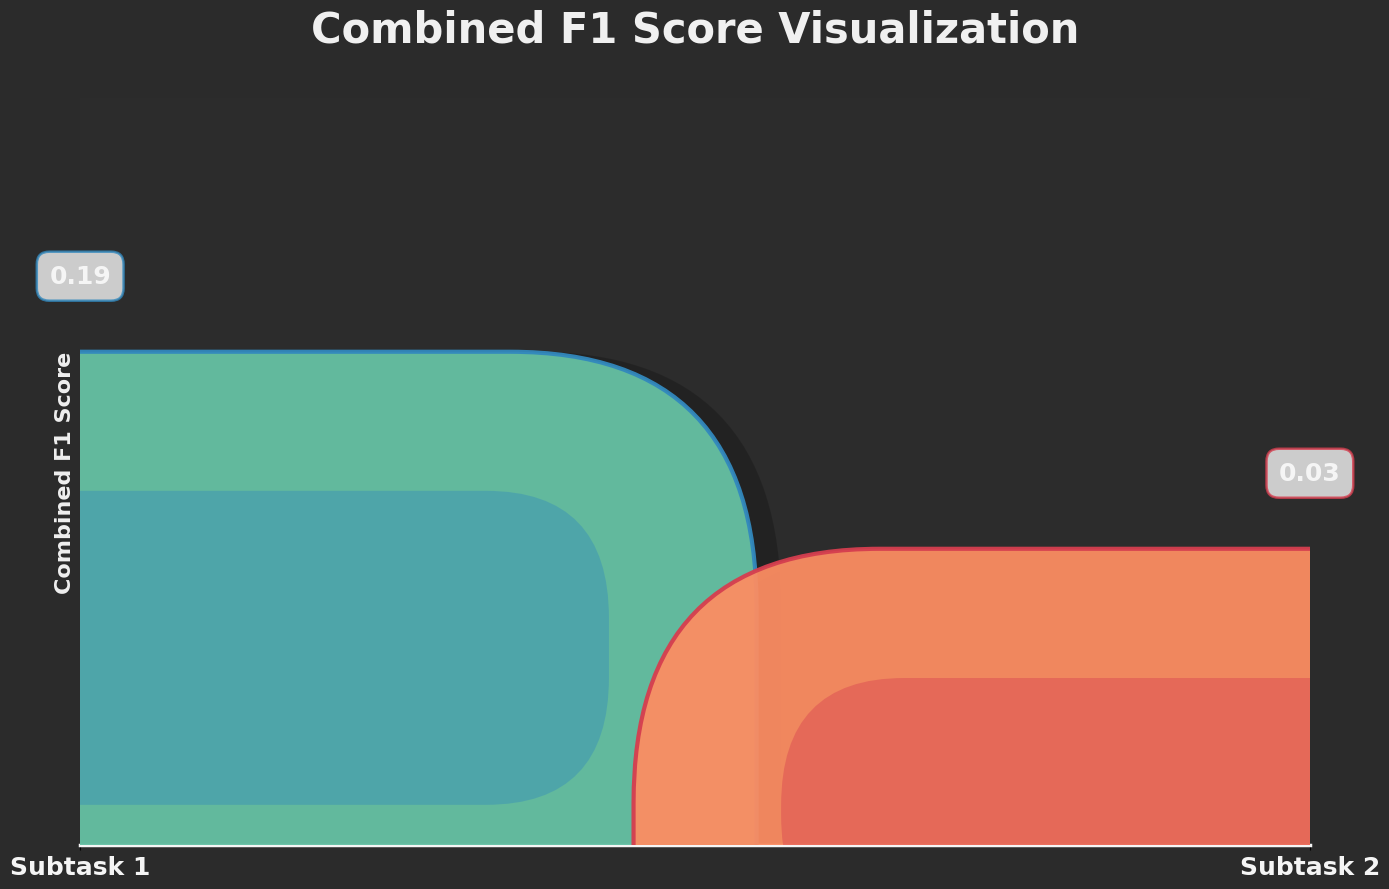

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from sklearn.metrics import f1_score

# Given compute_score function
def compute_score(hazards_true, products_true, hazards_pred, products_pred):
    f1_hazards = f1_score(hazards_true, hazards_pred, average='macro')
    f1_products = f1_score(
        products_true[hazards_pred == hazards_true],
        products_pred[hazards_pred == hazards_true],
        average='macro'
    )
    return (f1_hazards + f1_products) / 2.

# Sample scores (replace with your computed scores)
subtask_names = ['Subtask 1', 'Subtask 2']
combined_scores = [
    compute_score(y_test_hazard_cat_split, y_test_product_cat_split, test_predictions_hazard_cat, test_predictions_product_cat),
    compute_score(y_test_hazard_split, y_test_product_split, test_predictions_hazard, test_predictions_product)
]

# Color palette for a luxurious gradient and artistic effects
gradient_colors = [('#66c2a5', '#3288bd'), ('#fc8d62', '#d53e4f')]
highlight_color = '#f5f5f5'
background_color = '#2b2b2b'
title_color = '#f0f0f0'
shadow_color = '#1a1a1a'

# Plotting configuration
fig, ax = plt.subplots(figsize=(14, 9), facecolor=background_color)
ax.set_facecolor(background_color)

# Add multi-layered glow background to create a sense of depth
circle_1 = plt.Circle((0.5, 0.5), 1.5, color='#333333', alpha=0.1, transform=ax.transAxes, zorder=0)
circle_2 = plt.Circle((0.5, 0.5), 1.2, color='#444444', alpha=0.08, transform=ax.transAxes, zorder=0)
ax.add_patch(circle_1)
ax.add_patch(circle_2)

# Draw gradient bars with artistic design and subtle shadow effects
for idx, (score, colors) in enumerate(zip(combined_scores, gradient_colors)):
    # Use gradients for the bars
    bar = FancyBboxPatch(
        (idx - 0.35, 0),  # Coordinates
        0.7, score,  # Width and height
        boxstyle="round,pad=0.2",  # Rounded corners
        linewidth=3,
        edgecolor=colors[1],  # Outer gradient color
        facecolor=colors[0],  # Primary gradient color
        alpha=0.95,
        zorder=3
    )
    ax.add_patch(bar)

    # Add glow highlight on top of the bar to make it shine
    ax.add_patch(
        FancyBboxPatch(
            (idx - 0.33, score * 0.7),  # Coordinates to make it sit on the bar
            0.66, score * 0.25,  # Width and a fraction of height
            boxstyle="round,pad=0.1",  # Rounded corners
            linewidth=0,
            edgecolor=None,
            facecolor=colors[1],  # Lighter color to simulate glow
            alpha=0.4,
            zorder=4
        )
    )

    # Shadow effect behind bars for depth
    shadow = FancyBboxPatch(
        (idx - 0.35 + 0.02, -0.04),  # Slight offset for shadow
        0.7, score + 0.04,  # Width and height (slightly taller for shadow effect)
        boxstyle="round,pad=0.2",  # Rounded corners
        linewidth=0,
        facecolor=shadow_color,
        alpha=0.5,
        zorder=1  # Draw behind the bar
    )
    ax.add_patch(shadow)

# Add callout annotations above the bars with luxurious formatting
for idx, score in enumerate(combined_scores):
    ax.text(
        idx, score + 0.25,
        f'{score:.2f}',
        ha='center', va='bottom',
        fontsize=18, fontweight='bold',
        color=highlight_color,
        bbox=dict(boxstyle="round,pad=0.5", facecolor=highlight_color, edgecolor=gradient_colors[idx][1], linewidth=1.8, alpha=0.8),
        zorder=5  # Place text on top of everything else
    )

# Customizing the axes, title, and grid for an immersive effect
ax.set_xticks(np.arange(len(subtask_names)))
ax.set_xticklabels(subtask_names, fontsize=18, fontweight='bold', color=highlight_color)
ax.set_ylabel('Combined F1 Score', fontsize=16, fontweight='bold', color=title_color)
ax.set_ylim(0, max(combined_scores) + 0.4)
ax.set_yticks([])  # Hide y-ticks for an elegant look

# Add an enhanced title with rich typography
ax.set_title(
    'Combined F1 Score Visualization',
    fontsize=30, fontweight='bold', color=title_color, pad=40, loc='center'
)

# Remove unnecessary spines and enhance the bottom spine
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color(highlight_color)
ax.spines['bottom'].set_linewidth(2.5)

# Adding a soft, artistic dotted grid for readability
ax.yaxis.grid(True, linestyle=':', color='#888888', alpha=0.5)
ax.xaxis.grid(False)

# Adjust layout for balanced spacing and to maintain visual elegance
plt.tight_layout()
plt.show()


Step 3: Predict on Validation Data


In [124]:
# Predict hazard-category on validation data
val_predictions_hazard_cat = logreg_hazard_cat.predict(X_val_text)

# Predict product-category on validation data
val_predictions_product_cat = logreg_product_cat.predict(X_val_text)

# Predict hazard (vector) on validation data
val_predictions_hazard = logreg_hazard.predict(X_val_text)

# Predict product (vector) on validation data
val_predictions_product = logreg_product.predict(X_val_text)


Step 4: Save Predictions for Possible Submission

In [125]:
# Save predictions for Subtask 1
submission_lr_st1 = pd.DataFrame({
    'hazard-category': val_predictions_hazard_cat,
    'product-category': val_predictions_product_cat
})


# Save predictions for Subtask 2
submission_lr_st2 = pd.DataFrame({
    'hazard': val_predictions_hazard,
    'product': val_predictions_product
})




In [126]:
# submission_lr_st1.to_csv('C:\Users\magda\Desktop\pratical ds\Semeval2025-2\lr_submission_folder\submission_lr_st1.csv', index=False)
# submission_lr_st2.to_csv('C:\Users\magda\Desktop\pratical ds\Semeval2025-2\lr_submission_folder\submission_lr_st2.csv', index=False)